<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Manual 2D convolution implementation

#Manual 2D convolution implementation

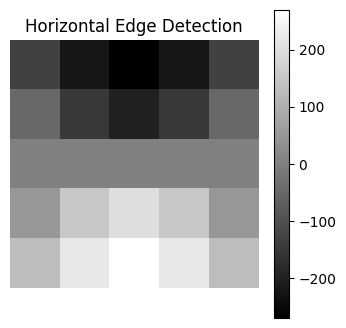

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Sample grayscale image (example 7x7 image)
image = np.array([
    [10, 10, 10, 10, 10, 10, 10],
    [10, 50, 50, 50, 50, 50, 10],
    [10, 50, 100,100,100,50, 10],
    [10, 50, 100,150,100,50, 10],
    [10, 50, 100,100,100,50, 10],
    [10, 50, 50, 50, 50, 50, 10],
    [10, 10, 10, 10, 10, 10, 10]
], dtype=np.float32)


# Manual convolution function
def apply_convolution(image, kernel):

    # Get dimensions
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate output dimensions
    out_height = img_height - kernel_height + 1
    out_width = img_width - kernel_width + 1

    # Initialize output feature map
    output = np.zeros((out_height, out_width))

    # Perform convolution
    for i in range(out_height):
        for j in range(out_width):

            # Extract current window
            window = image[i:i+kernel_height, j:j+kernel_width]

            # Apply kernel
            output[i, j] = np.sum(window * kernel)

    return output


# Horizontal edge detection filter
horizontal_edge_filter = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
], dtype=np.float32)


# Apply convolution
horizontal_edges = apply_convolution(image, horizontal_edge_filter)


# Plot result
plt.figure(figsize=(4, 4))
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edge Detection')
plt.colorbar()
plt.axis('off')
plt.show()


# Task 2: Experiment with different filters

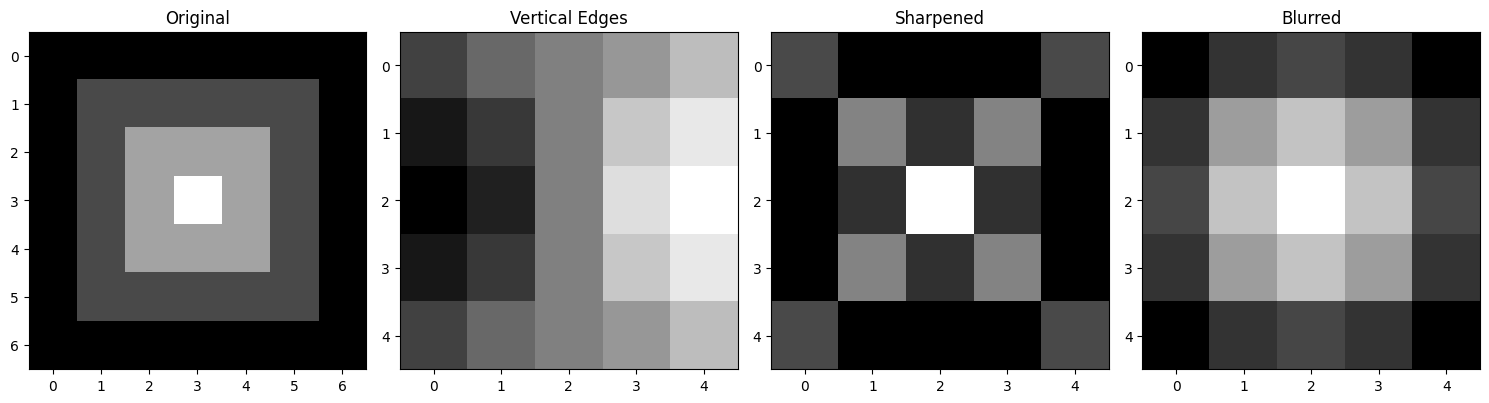

In [3]:

# Task 2: Experiment with different filters
# Vertical edge detection filter
vertical_edge_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Sharpening filter
sharpen_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Blur filter (box blur)
blur_filter = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

# Apply filters
vertical_edges = apply_convolution(image, vertical_edge_filter)
sharpened = apply_convolution(image, sharpen_filter)
blurred = apply_convolution(image, blur_filter)

# Display results side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')

plt.subplot(1, 4, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened')

plt.subplot(1, 4, 4)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred')

plt.tight_layout()
plt.show()

# Task 3: Implement max pooling

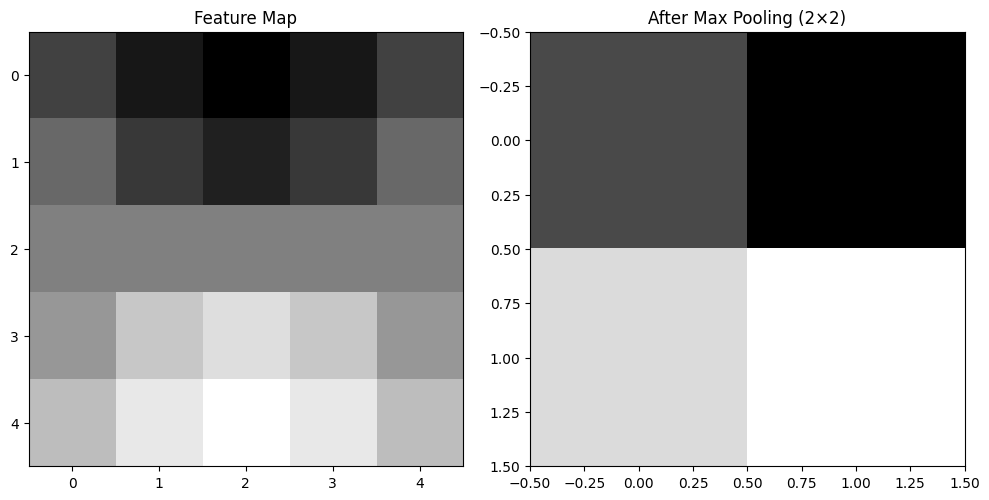

In [4]:
# Task 3: Implement max pooling
def max_pooling(feature_map, pool_size=2):
    # Get dimensions
    height, width = feature_map.shape

    # Calculate output dimensions
    out_height = height // pool_size
    out_width = width // pool_size

    # Initialize output
    output = np.zeros((out_height, out_width))

    # Perform max pooling
    for i in range(out_height):
        for j in range(out_width):
            # Extract current window and find maximum
            window = feature_map[i*pool_size:(i+1)*pool_size,
                               j*pool_size:(j+1)*pool_size]
            output[i, j] = np.max(window)

    return output

# Apply max pooling to one of our feature maps
pooled_edges = max_pooling(horizontal_edges)

# Display original feature map and pooled result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Feature Map')

plt.subplot(1, 2, 2)
plt.imshow(pooled_edges, cmap='gray')
plt.title('After Max Pooling (2×2)')

plt.tight_layout()
plt.show()